### Notebook 6: Tauc Analysis and Plotting
This notebook shows how to take optical measurements and x-ray fluorescence measurements to generate direct and indirect Tauc plots. Band gaps are then shown for each of three different methods, including:

- The Santosh-Newhouse-Gregoire Method
- The Segmentation Method
- The Multivariate Adaptive Regression Splines (MARS) Method

In [1]:
import sys
import pandas as pd
import numpy as np
from scipy import signal
sys.path.append('../lib')
#Note: When working in Windows environments, use:
#sys.path.append('..\lib')
#from library import Library
#from sample import Sample
from library_private import Library
from sample_private import Sample
from bandgaps import *
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

In [2]:
#Absorption coefficient
def band_gap_run(sample,bg_type='direct',show_graph=True,method='MARS'):
    try:
        optical_spectra = Sample(sample).spectra('optical') #Error with this in the absence of optical data.
        uvit = sorted(zip(list(optical_spectra.uvit_wave),list(optical_spectra.uvit_response)))
        uvir = sorted(zip(list(optical_spectra.uvir_wave),list(optical_spectra.uvir_response)))
        nirt = sorted(zip(list(optical_spectra.nirt_wave.dropna()),list(optical_spectra.nirt_response.dropna())))
        nirr = sorted(zip(list(optical_spectra.nirr_wave.dropna()),list(optical_spectra.nirr_response.dropna())))
    except TypeError:
        print "Sorry, the requested optical data is unavailable. :("
        return
    thickness = float(Sample(sample).properties().thickness)
    transmittance = sorted(uvit+nirt)
    reflectance = sorted(uvir+nirr)
    absorption_coefficient = []
    for i in range(0,len(transmittance)): #Equation for absorption coefficient
        absorption_coefficient.append(-1*np.log(abs(transmittance[i][1]/(1-reflectance[i][1])))/float(thickness*10**-4))
    energy = [1240.0/i[0] for i in transmittance]
    bg = calculate_band_gap(energy,absorption_coefficient,bg_type=bg_type,show_graph=show_graph,method=method)
    return round(bg,4)
    


def calculate_band_gap(energy,absorption_coefficient,bg_type='direct',show_graph=True,method='MARS'):
    absorption_coeff_savgol_filt = np.ndarray.tolist(scipy.signal.savgol_filter(absorption_coefficient,25,4))
    absorption_y = []
    if bg_type == 'direct':
        for k in range(0,len(absorption_coeff_savgol_filt)):
            absorption_y.append((abs(absorption_coeff_savgol_filt[k])**2.0)*energy[k]**2.0)
    elif bg_type == 'indirect':
        for k in range(0,len(absorption_coeff_savgol_filt)):
            absorption_y.append((abs(absorption_coeff_savgol_filt[k])**.5)*energy[k]**.5)
    elif bg_type == 'log10':
        for k in range(0,len(absorption_coeff_savgol_filt)):
            absorption_y.append(np.log10(abs(absorption_coeff_savgol_filt[k]))-3)
    elif bg_type == 'raw_alpha':
        for k in range(0,len(absorption_coeff_savgol_filt)):
            absorption_y.append(abs(absorption_coeff_savgol_filt[k]))
    else:
        return 'Not a valid band gap type.'
    
    if method == 'S-N-G':
        print('Currently Seeking Permission For Implementation')
        return
#        return santosh_newhouse_gregoire_method(energy,absorption_y,bg_type,show_graph)
    elif method == 'Segmentation':
        return segmentation_method(energy,absorption_y,bg_type,show_graph)
    elif method == 'MARS':
        return mars_method(energy,absorption_y,bg_type,show_graph)
    else:
        return 'Not a valid band gap methodology.'

/Users/mschwart/anaconda/lib/python2.7/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


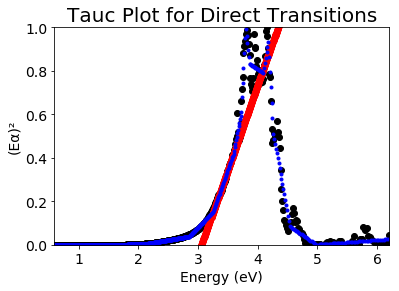

3.0588


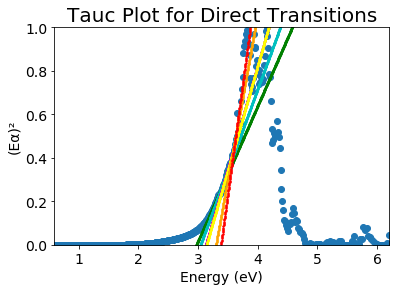

3.1611


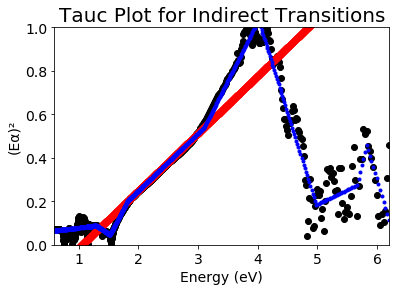

1.0565


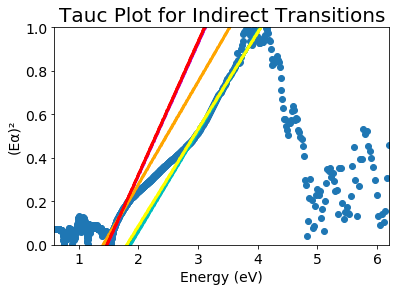

1.6341


In [3]:
#First, a basic test of the various methods...
    
bg = band_gap_run(221101,method='MARS')
print(bg)

bg = band_gap_run(221101,method='Segmentation')
print(bg)

#bg = band_gap_run(221101,method='S-N-G')
#print(bg)

bg = band_gap_run(221101,bg_type = 'indirect',method='MARS')
print(bg)

bg = band_gap_run(221101,bg_type = 'indirect',method='Segmentation')
print(bg)

#bg = band_gap_run(221101,method='S-N-G')
#print(bg)
